# Busca Básica em Grafos
O percorrimento dos vértices e arestas respeitando a estrutura dos grafos é chamado de **busca** e constitui uma operação básica em grafos dirigidos e não dirigidos. Este capítulo apresenta dois métodos diferentes para busca: **em largura** e **em profundidade**.

## Introdução
Estruturas de dados frequentemente precisam ser percorridas para que diversas operações sejam efetuadas, tais como: inserir ou remover novos elementos ou simplesmente fazer leitura de dados armazenados na estrutura. No caso dos grafos, o problema de manipulação da estrutura de dados é mais complexo, pois normalmente queremos percorrer a estrutura respeitando a sua topologia.

Os algoritmos de busca constituem métodos para resolver este problema, promovendo a pesquisa em grafos. Pesquisar um grafo significa visitar seus vértices passando sistematicamente por suas arestas, ou seja, não é apenas listar os vértices de um grafo em determinada ordem, mas sim atingir cada vértice obedecendo à estrutura do grafo, definida pelas arestas.

Existem basicamente dois métodos de busca:
- **Busca em Largura (BFS - Breadth-First Search)**
- **Busca em Profundidade (DFS - Depth-First Search)**

Os métodos de busca servem de base para a construção de outros algoritmos mais especializados, como:
- Algoritmo de Dijkstra (caminhos de custo mínimo)
- Algoritmo de Prim (árvore geradora mínima)
- Algoritmo de componentes fortemente conexas

Além disso, os algoritmos de busca têm aplicações diretas, como:
- Busca em grafos de estados na área de Inteligência Artificial
- Ordenação topológica de grafos acíclicos dirigidos

## Implementação Simples de Busca em Grafos
Abaixo estão implementações simples de busca em largura (BFS) e busca em profundidade (DFS) usando a biblioteca `networkx`.

In [108]:
a = 10
v = [0] * 10  
for i in range(10):
    v[i] = 0  
    print (v[i])

0
0
0
0
0
0
0
0
0
0


## Busca em Largura (BFS)

O método de busca em largura explora o grafo a partir de um vértice inicial arbitrário. A partir desse ponto, a busca se alastra uniformemente pelo grafo, visitando todos os vértices a uma mesma distância (em quantidade de arestas) do vértice inicial antes de avançar para distâncias maiores.

### Propriedades da Busca em Largura:
- **Caminhos mais curtos**: A busca em largura percorre os caminhos mais curtos desde o vértice inicial até cada vértice do grafo, medidos em quantidade de arestas.
- **Árvore de busca**: O conjunto de caminhos percorridos forma uma estrutura de árvore, chamada de **árvore de busca em largura**, cuja raiz é o vértice inicial.

### Representação da Árvore de Busca:
A árvore de busca em largura é uma árvore n-ária, pois não sabemos a priori quantos filhos cada nó terá. No entanto, sabemos que cada nó possui apenas um único pai. Assim, ao invés de armazenar os filhos de cada nó, podemos armazenar apenas uma referência para o pai de cada nó.

Essa estrutura é chamada de **vetor de roteamento** ou **vetor de predecessores**, denotado por `R(G)`. Cada entrada do vetor indica o pai de um vértice na árvore de busca.

### Exemplo:
Considere o grafo abaixo:

```
    s -- a -- b
    |    |
    c    d -- e
```
Se tomarmos o vértice `s` como inicial, a árvore de busca em largura seria:

```
    s
   / \
  c   a
     / \
    b   d
         \
          e
```
O vetor de roteamento `R(G)` seria representado como:

| Vértice | s   | a   | b   | c   | d   | e   |
|---------|-----|-----|-----|-----|-----|-----|
| Pai     | nil | s   | a   | s   | a   | d   |

### Conclusão:
A busca em largura é uma técnica eficiente para explorar grafos e encontrar os caminhos mais curtos em termos de número de arestas. Sua implementação computacional utiliza estruturas simples, como filas e vetores de predecessores, para armazenar os estados e os caminhos percorridos.

## Pseudocódigo do Algoritmo de Busca em Largura (BFS)

O algoritmo de busca em largura (BFS - Breadth First Search) explora o grafo a partir de um vértice inicial `r` e utiliza uma fila para conduzir a ordem de visitação dos vértices. Cada vértice possui atributos que ajudam a controlar o estado da busca e armazenar informações importantes, como o pai na árvore de busca e a distância do vértice inicial.

### Elementos do Pseudocódigo:
- **`r`**: Representa o vértice inicial da busca.
- **`estado(v)`**: Indica o estado atual do vértice `v` durante a execução do algoritmo. Pode assumir os seguintes valores:
  - `NAO_VISITADO`: O vértice ainda não foi atingido pela busca.
  - `VISITADO`: O vértice foi atingido, mas ainda possui vizinhos não visitados.
  - `ENCERRADO`: O vértice e todos os seus vizinhos já foram visitados.
- **`fl(v)`**: Referência ao vértice predecessor de `v` na busca, representando o pai de `v` na árvore de busca em largura.
- **`F`**: Fila de vértices que conduz a ordem de visitação. As operações realizadas na fila são:
  - `F.INSERE(v)`: Insere o vértice `v` no final da fila.
  - `F.REMOVE()`: Remove e retorna o primeiro vértice da fila.
- **`d(v)`**: Atributo numérico que armazena a distância do vértice inicial `r` até o vértice `v`, medida em quantidade de arestas percorridas.
- **`adj(v)`**: Iteração sobre todos os vértices adjacentes ao vértice `v`.

### Pseudocódigo:
```
BuscaEmLargura(G, r):
  Para cada vértice v em V faça:
    estado(v) ← NAO_VISITADO
    fl(v) ← nil
    d(v) ← ∞

  estado(r) ← VISITADO
  d(r) ← 0

  F ← []  # Inicializa a fila vazia
  F.INSERE(r)

  Enquanto F ≠ vazio faça:
    vi ← F.REMOVE()
    Para cada vj em adj(vi) faça:
      Se estado(vj) = NAO_VISITADO então:
        estado(vj) ← VISITADO
        fl(vj) ← vi
        d(vj) ← d(vi) + 1
        F.INSERE(vj)
    estado(vi) ← ENCERRADO
```

### Explicação do Funcionamento:
1. **Inicialização**: Todos os vértices começam com o estado `NAO_VISITADO`, sem pai (`fl(v) = nil`) e com distância infinita (`d(v) = ∞`). O vértice inicial `r` é marcado como `VISITADO`, sua distância é definida como 0, e ele é inserido na fila.
2. **Processamento da Fila**: Enquanto a fila não estiver vazia, o algoritmo remove o primeiro vértice da fila (`vi`) e processa todos os seus vizinhos (`vj`).
3. **Visitação dos Vizinhos**: Para cada vizinho `vj` que ainda não foi visitado (`estado(vj) = NAO_VISITADO`), o algoritmo:
   - Marca `vj` como `VISITADO`.
   - Define `vi` como o pai de `vj` (`fl(vj) = vi`).
   - Calcula a distância de `vj` como `d(vi) + 1`.
   - Insere `vj` na fila.
4. **Encerramento**: Após processar todos os vizinhos de `vi`, o vértice é marcado como `ENCERRADO`.

### Conclusão:
O algoritmo BFS é eficiente para explorar grafos e encontrar os caminhos mais curtos em termos de número de arestas. Ele utiliza estruturas simples, como filas e atributos nos vértices, para armazenar o estado da busca e construir a árvore de busca em largura.



## Biblioteca `deque`

A biblioteca `deque` (double-ended queue) faz parte do módulo `collections` do Python e é utilizada para criar filas de alta performance. Ela permite inserções e remoções de elementos em ambas as extremidades da fila com complexidade O(1).

### Principais Métodos:
- `append(x)`: Adiciona o elemento `x` ao final da fila.
- `appendleft(x)`: Adiciona o elemento `x` ao início da fila.
- `pop()`: Remove e retorna o último elemento da fila.
- `popleft()`: Remove e retorna o primeiro elemento da fila.

### Exemplo de Uso:
```python
from collections import deque

# Criando uma deque
fila = deque()

# Adicionando elementos
fila.append(1)  # Adiciona ao final
fila.appendleft(2)  # Adiciona ao início

# Removendo elementos
fila.pop()  # Remove do final
fila.popleft()  # Remove do início
```

In [109]:
# Implementação de BFS com impressão dos passos
from collections import deque

def busca_largura(G, r):
    estado = {}  # Dicionário para armazenar o estado de cada nó
    pai = {}  # Dicionário para armazenar o pai de cada nó
    distancia = {}  # Dicionário para armazenar a distância de cada nó

    # Inicialização
    for v in G:
        estado[v] = 'NAO_VISITADO'
        pai[v] = None
        distancia[v] = float('inf')

    estado[r] = 'VISITADO'
    distancia[r] = 0

    fila = deque([r])  # Fila inicializada com o nó inicial

    print("Início do BFS")
    print(f"Fila inicial: {list(fila)}")

    while fila:
        vi = fila.popleft()  # Remove o primeiro elemento da fila
        print(f"\nProcessando vértice: {vi}")
        for vj in G[vi]:
            if estado[vj] == 'NAO_VISITADO':
                estado[vj] = 'VISITADO'
                pai[vj] = vi
                distancia[vj] = distancia[vi] + 1
                fila.append(vj)
                print(f"  Visitando {vj}: estado={estado[vj]}, pai={pai[vj]}, distancia={distancia[vj]}")
        estado[vi] = 'ENCERRADO'  # Marca o nó como processado
        print(f"  Fila atual: {list(fila)}")
        print(f"  Estado de {vi}: {estado[vi]}")

    print("\nFim do BFS")
    # Retorna os resultados
    return estado, pai, distancia


## Exemplo de Uso da Função BFS

Abaixo está um exemplo de como utilizar a função `bfs` com um grafo simples representado como um dicionário.

### Visualização do Grafo

Abaixo está um exemplo de como desenhar o grafo utilizando as bibliotecas `networkx` e `matplotlib`.

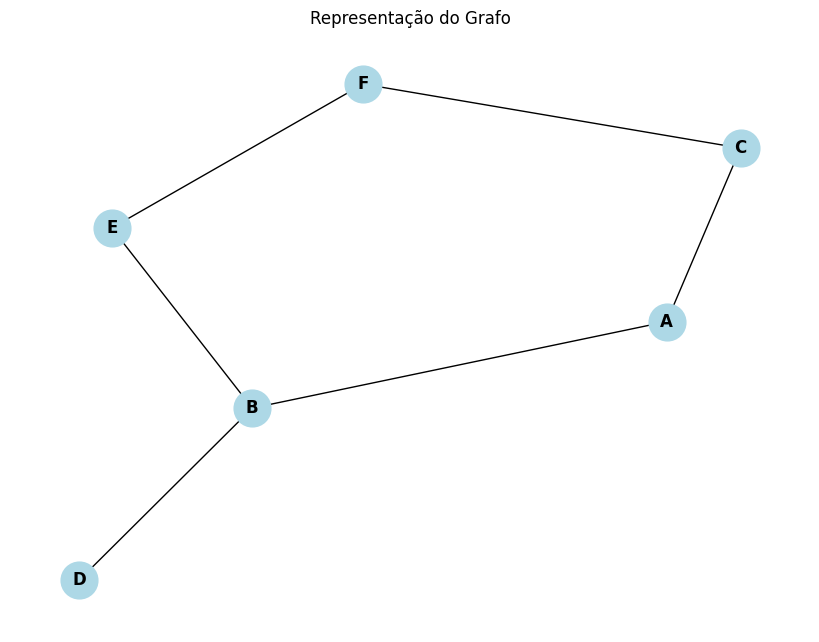

In [110]:
import networkx as nx
import matplotlib.pyplot as plt

# Exemplo de grafo representado como um dicionário
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Criando o grafo com networkx
G = nx.Graph()
for vertice, vizinhos in grafo.items():
    for vizinho in vizinhos:
        G.add_edge(vertice, vizinho)

# Desenhando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Representação do Grafo")
plt.show()



### Execução do algoritmo BFS

In [111]:
# Executando a busca em largura a partir do vértice 'A'
r = 'A'
estado, pai, distancia = busca_largura(G, r)

# Exibindo os resultados
print("Estado:", estado)
print("Pai:", pai)
print("Distância:", distancia)

# Exibindo os resultados formatados com explicações
print("\n--- Resultados da Busca em Largura (BFS) ---")

print("\nEstado dos Vértices:")
for vertice, estado_vertice in estado.items():
    print(f"  Vertice {vertice}: Estado do Vertice {estado_vertice} - O vértice foi completamente processado.")

print("\nRelação de Pais:")
for vertice, pai_vertice in pai.items():
    if pai_vertice is None:
        print(f"  Vertice {vertice}: {pai_vertice} - O vértice {vertice} é o ponto de partida, então não possui pai.")
    else:
        print(f"  Vertice {vertice}: Pai {pai_vertice} - O vértice {vertice} foi visitado a partir de {pai_vertice}.")

print("\nDistâncias:")
for vertice, distancia_vertice in distancia.items():
    print(f"  Vertice {vertice}: Distância {distancia_vertice} - Distância mínima do vértice inicial {r}.")

Início do BFS
Fila inicial: ['A']

Processando vértice: A
  Visitando B: estado=VISITADO, pai=A, distancia=1
  Visitando C: estado=VISITADO, pai=A, distancia=1
  Fila atual: ['B', 'C']
  Estado de A: ENCERRADO

Processando vértice: B
  Visitando D: estado=VISITADO, pai=B, distancia=2
  Visitando E: estado=VISITADO, pai=B, distancia=2
  Fila atual: ['C', 'D', 'E']
  Estado de B: ENCERRADO

Processando vértice: C
  Visitando F: estado=VISITADO, pai=C, distancia=2
  Fila atual: ['D', 'E', 'F']
  Estado de C: ENCERRADO

Processando vértice: D
  Fila atual: ['E', 'F']
  Estado de D: ENCERRADO

Processando vértice: E
  Fila atual: ['F']
  Estado de E: ENCERRADO

Processando vértice: F
  Fila atual: []
  Estado de F: ENCERRADO

Fim do BFS
Estado: {'A': 'ENCERRADO', 'B': 'ENCERRADO', 'C': 'ENCERRADO', 'D': 'ENCERRADO', 'E': 'ENCERRADO', 'F': 'ENCERRADO'}
Pai: {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Distância: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}

--- Resultado

## Interpretação dos Resultados da Busca em Largura (BFS)

### Estado dos Vértices:
O dicionário `estado` indica o estado final de cada vértice após a execução do algoritmo BFS:
- `'ENCERRADO'`: Significa que o vértice foi completamente processado, ou seja, todos os seus vizinhos foram visitados.

### Relação de Pais:
O dicionário `pai` mostra o vértice pai de cada nó no caminho percorrido pelo BFS:
- `'A': None`: O vértice `'A'` é o ponto de partida, então não possui pai.
- `'B': 'A'`: O vértice `'B'` foi visitado a partir do vértice `'A'`.
- `'C': 'A'`: O vértice `'C'` foi visitado a partir do vértice `'A'`.
- `'D': 'B'`: O vértice `'D'` foi visitado a partir do vértice `'B'`.
- `'E': 'B'`: O vértice `'E'` foi visitado a partir do vértice `'B'`.
- `'F': 'C'`: O vértice `'F'` foi visitado a partir do vértice `'C'`.

### Distâncias:
O dicionário `distancia` armazena a menor distância (em número de arestas) do vértice inicial `'A'` até cada vértice:
- `'A': 0`: O vértice inicial tem distância 0 de si mesmo.
- `'B': 1`: O vértice `'B'` está a uma aresta de distância de `'A'`.
- `'C': 1`: O vértice `'C'` está a uma aresta de distância de `'A'`.
- `'D': 2`: O vértice `'D'` está a duas arestas de distância de `'A'`.
- `'E': 2`: O vértice `'E'` está a duas arestas de distância de `'A'`.
- `'F': 2`: O vértice `'F'` está a duas arestas de distância de `'A'`.

### Conclusão:
O algoritmo BFS percorreu o grafo de forma sistemática, visitando todos os vértices acessíveis a partir do vértice inicial `'A'`. Os resultados mostram a ordem de visitação, as relações de parentesco entre os vértices e as distâncias mínimas calculadas.

## Busca em Profundidade (DFS)

A busca em profundidade, também chamada de DFS (do inglês Depth First Search), pesquisa o grafo de forma recursiva, explorando sempre o caminho mais profundo antes de voltar atrás. Este procedimento de voltar atrás é conhecido como **backtracking**.

### Propriedades da Busca em Profundidade:
- A busca em profundidade gera uma **árvore de busca**, mas não garante os menores caminhos entre o vértice inicial e os demais vértices.
- O algoritmo atinge todos os vértices possíveis de serem alcançados a partir do vértice inicial.

### Pseudocódigo:
```
BuscaEmProfundidade(G, r):
  para cada v em V faça:
    estado(v) ← NAO_VISITADO
    fl(v) ← nil
  tempo ← 0
  VisitaVertice(r)
```

### Elementos do Pseudocódigo:
- **`r`**: Representa o vértice inicial da busca.
- **`estado(v)`**: Representa o estado de visitação do vértice `v` durante a execução do algoritmo. Pode assumir os seguintes valores:
  - `NAO_VISITADO`: O vértice ainda não foi atingido pela busca.
  - `VISITADO`: O vértice foi atingido, mas ainda possui vizinhos não visitados.
  - `ENCERRADO`: O vértice e todos os seus vizinhos já foram visitados.
- **`fl(v)`**: Referência ao vértice predecessor de `v` na busca, representando o pai de `v` na árvore de busca em profundidade.
- **`tempo`**: Relógio lógico que marca a ordem de visitação dos vértices. É utilizado para rotular eventos com números inteiros, variando de 0 a 2n.
- **`ta(v)`**: Tempo de descoberta ou abertura do vértice `v`, representando o valor do tempo lógico quando o vértice é visitado pela primeira vez.
- **`te(v)`**: Tempo de encerramento do vértice `v`, representando o valor do tempo lógico quando a visitação no vértice é encerrada.

### Funcionamento:
1. **Inicialização**: Todos os vértices começam com o estado `NAO_VISITADO` e sem pai (`fl(v) = nil`). O tempo lógico é inicializado como 0.
2. **Visitação Recursiva**: A partir do vértice inicial `r`, o algoritmo visita recursivamente os vizinhos não visitados, marcando o tempo de descoberta (`ta(v)`) e o tempo de encerramento (`te(v)`) de cada vértice.
3. **Backtracking**: Quando não há mais vizinhos não visitados, o algoritmo volta gradativamente aos passos anteriores até encontrar um novo caminho.

### Conclusão:
A busca em profundidade é uma técnica poderosa para explorar grafos, especialmente em problemas que exigem a análise de caminhos ou ciclos. O uso do tempo lógico (`ta(v)` e `te(v)`) permite resolver problemas mais complexos, como detecção de ciclos e ordenação topológica.

## Busca em Profundidade com um Vértice de Origem

Assim como na busca em largura, a busca em profundidade também gera uma **árvore de busca**, porém ela não tem a propriedade de gerar os caminhos mínimos.

### Algoritmo Principal
O algoritmo de busca em profundidade é desmembrado em mais de um procedimento. O primeiro deles apresenta o laço principal da busca em profundidade. De forma semelhante ao algoritmo de busca em largura, podemos escolher um vértice para iniciar a busca. Este algoritmo atinge todos os vértices possíveis de serem atingidos a partir do vértice inicial `r`, porém não há garantia de que a árvore de busca gerada contenha os menores caminhos de `r` até cada vértice.

#### Pseudocódigo:
```
BuscaEmProfundidade(G, r):
  para cada v em V faça:
    estado(v) ← NAO_VISITADO
    fl(v) ← nil
  tempo ← 0
  VisitaVertice(r)
```

### Elementos do Algoritmo:
- **`r`**: Representa o vértice inicial.
- **`estado(v)`**: Representa o estado de visitação do vértice `v` ao longo da execução do algoritmo. Pode assumir os seguintes valores:
  - `NAO_VISITADO`: O vértice ainda não foi atingido pela busca.
  - `VISITADO`: O vértice foi atingido, mas ainda possui vizinhos não visitados.
  - `ENCERRADO`: O vértice e todos os seus vizinhos já foram visitados.
- **`fl(v)`**: Referência ao vértice predecessor do vértice `v` na busca, representando seu pai na árvore de busca.
- **`tempo`**: Relógio lógico que marca a ordem de visitação dos vértices. Este dado pode ser utilizado na resolução de problemas que envolvem a busca em profundidade. O relógio lógico implementa uma técnica chamada de **time stamping**, que rotula com números inteiros uma sequência de eventos. No caso do algoritmo de busca em profundidade, estes valores variam de 0 a 2n.
- **`ta(v)`**: Tempo de descoberta ou abertura do vértice `v`, representando o valor do tempo lógico quando o vértice é visitado pela primeira vez.
- **`te(v)`**: Tempo de encerramento do vértice `v`, representando o valor do tempo lógico quando a visitação no vértice é encerrada.

### Função Recursiva
A função `VisitaVertice` implementa o procedimento de busca em profundidade. Ela visita todos os vértices que puderem ser atingidos a partir do vértice inicial `r`. A recursividade da função caracteriza um empilhamento dos vértices a serem visitados, com isso a ordem de visitação é feita em profundidade, sempre visitando o primeiro vértice não visitado adjacente ao vértice atual.

#### Pseudocódigo:
```
VisitaVertice(vi):
  estado(vi) ← VISITADO
  tempo ← tempo + 1
  ta(vi) ← tempo
  para cada vj em Adj(vi) faça:
    se estado(vj) = NAO_VISITADO então:
      fl(vj) ← vi
      VisitaVertice(vj)
  estado(vi) ← ENCERRADO
  tempo ← tempo + 1
  te(vi) ← tempo
```

### Funcionamento:
1. **Inicialização**: Todos os vértices começam com o estado `NAO_VISITADO` e sem pai (`fl(v) = nil`). O tempo lógico é inicializado como 0.
2. **Visitação Recursiva**: A partir do vértice inicial `r`, o algoritmo visita recursivamente os vizinhos não visitados, marcando os tempos de descoberta (`ta(v)`) e encerramento (`te(v)`).
3. **Backtracking**: Quando não há mais vizinhos não visitados, o algoritmo retrocede para explorar outros caminhos.

### Conclusão:
A busca em profundidade é uma técnica eficiente para explorar grafos, especialmente em problemas que exigem análise de caminhos ou ciclos. O uso do tempo lógico permite resolver problemas mais complexos, como detecção de ciclos e ordenação topológica.

### Execução do algoritmo DFS

In [133]:
# Função recursiva para visitar os vértices
def visita_vertice(G, v, estado, pai, tempo):
    estado[v] = 'VISITADO'
    tempo[0] += 1
    print(f"Visitando {v}: tempo = {tempo[0]}")

    for vizinho in G[v]:
        if estado[vizinho] == 'NAO_VISITADO':
            pai[vizinho] = v
            visita_vertice(G, vizinho, estado, pai, tempo)

    estado[v] = 'ENCERRADO'
    tempo[0] += 1
    print(f"Encerrando {v}: tempo = {tempo[0]}")


# Função principal da busca em profundidade
def busca_profundidade_vertice_origem(G, r):
    estado = {}  # Dicionário para armazenar o estado de cada nó
    pai = {}  # Dicionário para armazenar o pai de cada nó
    tempo = [0]  # Relógio lógico como lista para ser mutável

    # Inicialização
    for v in G:
        estado[v] = 'NAO_VISITADO'
        pai[v] = None

    # Inicia a visita a partir do vértice inicial
    visita_vertice(G, r, estado, pai, tempo)

    # Retorna os resultados
    return estado, pai

### Execução do algoritmo DFS

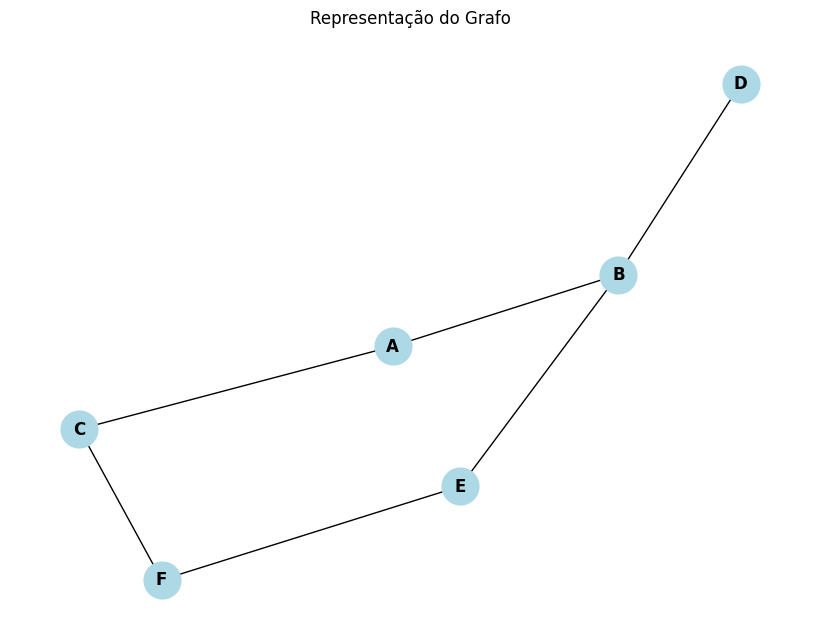

In [113]:
import networkx as nx
import matplotlib.pyplot as plt
# Exemplo de grafo representado como um dicionário
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

import networkx as nx
import matplotlib.pyplot as plt

# Criando o grafo com networkx
G = nx.Graph()
for vertice, vizinhos in grafo.items():
    for vizinho in vizinhos:
        G.add_edge(vertice, vizinho)

# Desenhando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Representação do Grafo")
plt.show()


In [114]:
# Executando a busca em profundidade a partir do vértice 'A'
r = 'A'
estado, pai = busca_profundidade_vertice_origem(G, r)

# Exibindo os resultados
print("\n--- Resultados da Busca em Profundidade (DFS) ---")
print("\nEstado dos Vértices:")
for vertice, estado_vertice in estado.items():
    print(f"  {vertice}: {estado_vertice}")

print("\nRelação de Pais:")
for vertice, pai_vertice in pai.items():
    print(f"  {vertice}: {pai_vertice}")




Visitando A: tempo = 1
Visitando B: tempo = 2
Visitando D: tempo = 3
Encerrando D: tempo = 4
Visitando E: tempo = 5
Visitando F: tempo = 6
Visitando C: tempo = 7
Encerrando C: tempo = 8
Encerrando F: tempo = 9
Encerrando E: tempo = 10
Encerrando B: tempo = 11
Encerrando A: tempo = 12

--- Resultados da Busca em Profundidade (DFS) ---

Estado dos Vértices:
  A: ENCERRADO
  B: ENCERRADO
  C: ENCERRADO
  D: ENCERRADO
  E: ENCERRADO
  F: ENCERRADO

Relação de Pais:
  A: None
  B: A
  C: F
  D: B
  E: B
  F: E


## Busca em Profundidade com Várias Origens

Em alguns casos, a busca a partir de um vértice inicial `r` não consegue atingir todos os vértices. Isto pode acontecer em grafos dirigidos e em grafos não-conexos. Nestes casos, se for necessário visitar todos os vértices, pode-se iniciar sucessivas buscas em profundidade. Sempre que uma busca encerrar, inicia-se uma nova busca a partir de um vértice ainda não visitado.

### Algoritmo: BuscaProfTodos(G)

```
BuscaProfTodos(G):
  para cada v em V faça:
    estado(v) ← NAO_VISITADO
    fl(v) ← nil
  tempo ← 0
  para cada vértice v em V faça:
    se estado(v) = NAO_VISITADO então:
      VisitaVertice(v)
```

### Funcionamento:
1. **Inicialização**: Todos os vértices começam com o estado `NAO_VISITADO` e sem pai (`fl(v) = nil`).
2. **Percorrendo o Grafo**: O algoritmo percorre todos os vértices do grafo. Sempre que encontra um vértice ainda não visitado, inicia uma nova busca em profundidade a partir dele.
3. **Árvores de Busca**: Ao final, todos os vértices são visitados, e o vetor de roteamento contém uma árvore para cada uma das buscas realizadas. Os vértices que originaram as buscas são as raízes das árvores, e seus predecessores têm valor `nil`.

### Conclusão:
O algoritmo `BuscaProfTodos` é útil para explorar grafos não-conexos ou dirigidos, garantindo que todos os vértices sejam visitados. Ele gera uma árvore de busca para cada componente do grafo, com as raízes sendo os vértices que originaram as buscas.

In [115]:
# Função para imprimir os passos da busca em profundidade com várias origens
def busca_em_profundidade_varias_origens(G):
    estado = {}  # Dicionário para armazenar o estado de cada nó
    pai = {}  # Dicionário para armazenar o pai de cada nó
    tempo = [0]  # Relógio lógico como lista para ser mutável

    # Inicialização
    for v in G:
        estado[v] = 'NAO_VISITADO'
        pai[v] = None

    print("Início da Busca em Profundidade com Várias Origens")

    # Percorre todos os vértices do grafo
    for v in G:
        if estado[v] == 'NAO_VISITADO':
            print(f"\nIniciando nova busca a partir do vértice: {v}")
            visita_vertice(G, v, estado, pai, tempo)

    print("\nFim da Busca em Profundidade com Várias Origens")

    # Retorna os resultados
    return estado, pai

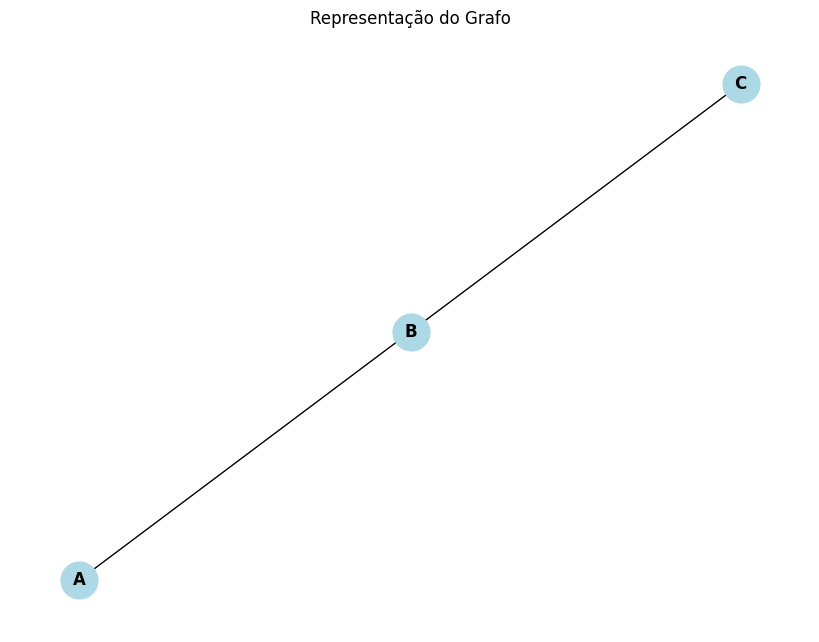

In [116]:
# Exemplo de uso da função busca_prof_todos_com_passos
# Exemplo mais simples de grafo
grafo = {
    'A': ['B'],
    'B': ['A', 'C'],
    'C': ['B'],
    'D': []
}

import networkx as nx
import matplotlib.pyplot as plt

# Criando o grafo com networkx
G = nx.Graph()
for vertice, vizinhos in grafo.items():
    for vizinho in vizinhos:
        G.add_edge(vertice, vizinho)

# Desenhando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Representação do Grafo")
plt.show()


In [117]:

estado, pai = busca_em_profundidade_varias_origens(grafo)

# Exibindo os resultados
print("\n--- Resultados da Busca em Profundidade com Várias Origens ---")
print("\nEstado dos Vértices:")
for vertice, estado_vertice in estado.items():
    print(f"  {vertice}: {estado_vertice}")

print("\nRelação de Pais:")
for vertice, pai_vertice in pai.items():
    print(f"  {vertice}: {pai_vertice}")

Início da Busca em Profundidade com Várias Origens

Iniciando nova busca a partir do vértice: A
Visitando A: tempo = 1
Visitando B: tempo = 2
Visitando C: tempo = 3
Encerrando C: tempo = 4
Encerrando B: tempo = 5
Encerrando A: tempo = 6

Iniciando nova busca a partir do vértice: D
Visitando D: tempo = 7
Encerrando D: tempo = 8

Fim da Busca em Profundidade com Várias Origens

--- Resultados da Busca em Profundidade com Várias Origens ---

Estado dos Vértices:
  A: ENCERRADO
  B: ENCERRADO
  C: ENCERRADO
  D: ENCERRADO

Relação de Pais:
  A: None
  B: A
  C: B
  D: None


## Percorrendo a Árvore de Busca

Os caminhos gerados pelos algoritmos de busca, armazenados em vetores de roteamento, podem ser reconstituídos por meio do algoritmo abaixo. Este algoritmo é recursivo e só funciona para caminhos começando no vértice inicial utilizado no algoritmo de busca que gerou o correspondente vetor de roteamento. Tal vértice sempre é a raiz `r` de uma árvore de busca.

### Algoritmo: ImprimeCaminho(G, r, v)
```
se v = r então
    imprime(r);
senão
    se fl(v) = nil então
        imprime("não existe caminho de r para v");
    senão
        ImprimeCaminho(G, r, fl(v));
        imprime(v);
```

### Explicação:
- **Caso Base**: Se o vértice `v` é igual ao vértice inicial `r`, o algoritmo imprime `r` e termina.
- **Caminho Inexistente**: Se o predecessor de `v` (`fl(v)`) for `nil`, significa que não existe caminho de `r` para `v`.
- **Recursão**: Caso contrário, o algoritmo chama recursivamente `ImprimeCaminho` para o predecessor de `v` e, ao retornar, imprime `v`.

### Conclusão:
Este procedimento permite reconstruir e imprimir os caminhos gerados pelos algoritmos de busca, como BFS e DFS, de forma eficiente e estruturada.

In [ ]:
# Função para imprimir o caminho de r até v
def imprime_caminho(pai, r, v):
    if v == r:
        print(r, end=' ')
    elif pai[v] is None:
        print(f"Não existe caminho de {r} para {v}")
    else:
        imprime_caminho(pai, r, pai[v])
        print(v, end=' ')



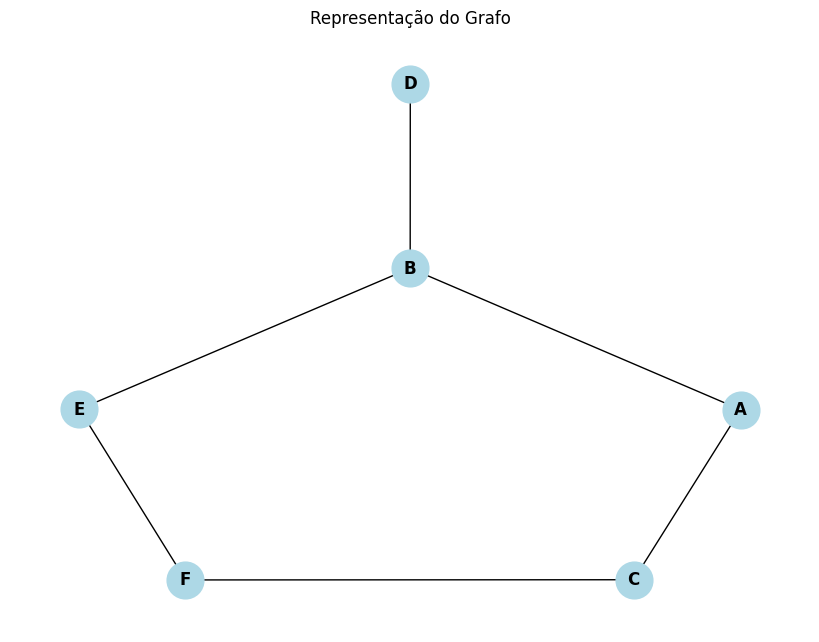

In [128]:
# Exemplo de grafo
grafo = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

import networkx as nx
import matplotlib.pyplot as plt

# Criando o grafo com networkx
G = nx.Graph()
for vertice, vizinhos in grafo.items():
    for vizinho in vizinhos:
        G.add_edge(vertice, vizinho)

# Desenhando o grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Representação do Grafo")
plt.show()


In [139]:
# Encontrando o caminho de A para E
inicio = 'A'
destino = 'C'
_, pai, _ = busca_largura(grafo, inicio)
print(pai)
# Imprimindo o caminho
print(f"Caminho de {inicio} para {destino}: ", end='')
imprime_caminho(pai, inicio, destino)

Início do BFS
Fila inicial: ['A']

Processando vértice: A
  Visitando B: estado=VISITADO, pai=A, distancia=1
  Visitando C: estado=VISITADO, pai=A, distancia=1
  Fila atual: ['B', 'C']
  Estado de A: ENCERRADO

Processando vértice: B
  Visitando D: estado=VISITADO, pai=B, distancia=2
  Visitando E: estado=VISITADO, pai=B, distancia=2
  Fila atual: ['C', 'D', 'E']
  Estado de B: ENCERRADO

Processando vértice: C
  Visitando F: estado=VISITADO, pai=C, distancia=2
  Fila atual: ['D', 'E', 'F']
  Estado de C: ENCERRADO

Processando vértice: D
  Fila atual: ['E', 'F']
  Estado de D: ENCERRADO

Processando vértice: E
  Fila atual: ['F']
  Estado de E: ENCERRADO

Processando vértice: F
  Fila atual: []
  Estado de F: ENCERRADO

Fim do BFS
{'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
Caminho de A para C: A C 